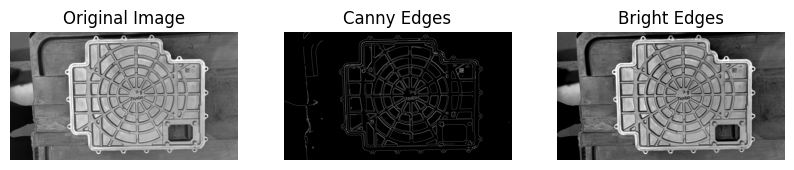

In [19]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

def display_edges(image_path, low_threshold, high_threshold, alpha, beta):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Generate random contrast and brightness values
    contrast = random.uniform(0.5, 1.5)  # You can adjust the range as needed
    brightness = random.randint(-50, 50)  # You can adjust the range as needed

    # Apply contrast and brightness adjustment
    adjusted_img = np.clip(contrast * img + brightness, 0, 255).astype(np.uint8)

    # Apply GaussianBlur to reduce noise and help Canny edge detection
    img_blur = cv2.GaussianBlur(adjusted_img, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(img_blur, low_threshold, high_threshold)
    
    bright_img = cv2.addWeighted(edges, alpha, np.zeros_like(edges), 0, beta)

    # Display the original and edge-detected images using matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(adjusted_img, cmap='gray')
    plt.title('Bright Edges')
    plt.axis('off')

    plt.show()

# Set the path to your image
image_path = 'D:\Computer Vision Project\MicrosoftTeams-image (15).png'

# Set the low and high thresholds for Canny edge detection
low_threshold = 30
high_threshold = 150
alpha = 15
beta =0.1

# Call the function to display the edges
display_edges(image_path, low_threshold, high_threshold, alpha , beta)

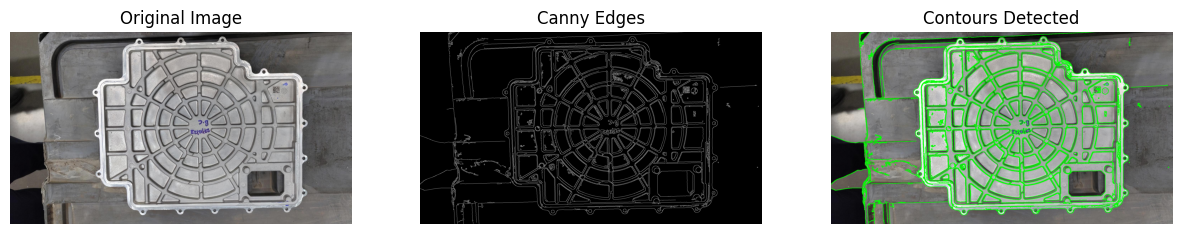

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_edges(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection
    edges = cv2.Canny(blurred, 30, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours on the original image
    img_with_contours = img.copy()
    cv2.drawContours(img_with_contours, contours, -1, (0, 255, 0), 2)

    # Display the original image, edges, and contours
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))
    plt.title('Contours Detected')
    plt.axis('off')

    plt.show()

# Set the path to your image
image_path = 'D:\Computer Vision Project\MicrosoftTeams-image (15).png'

# Call the function to detect edges and display the images
detect_edges(image_path)


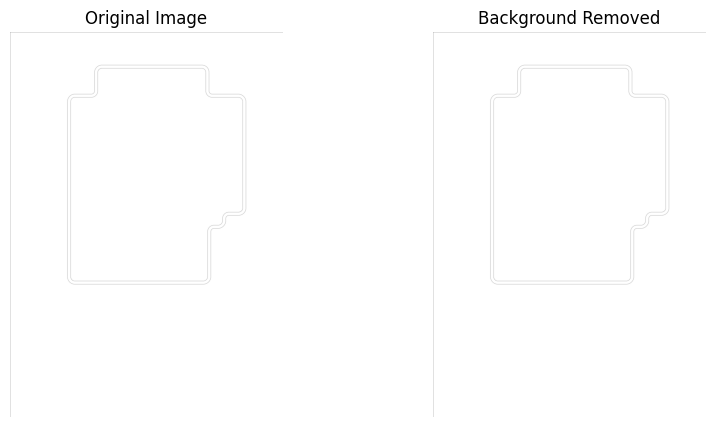

In [135]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def remove_background(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use adaptive thresholding to create a binary mask
    _, mask = cv2.threshold(blurred, 147, 255, cv2.THRESH_BINARY)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask for the contours
    contour_mask = np.zeros_like(mask)
    cv2.drawContours(contour_mask, contours, -1, (255), thickness=cv2.FILLED)

    # Apply the contour mask to the original image
    result = cv2.bitwise_and(img, img, mask=contour_mask)
    
    cv2.imwrite('output_image.jpg', result)


    # Display the original image and the result
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title('Background Removed')
    plt.axis('off')

    plt.show()

# Set the path to your image
image_path = r"C:\Users\167093\Downloads\glue_gun_path.png"

# Call the function to remove the background and display the images
remove_background(image_path)


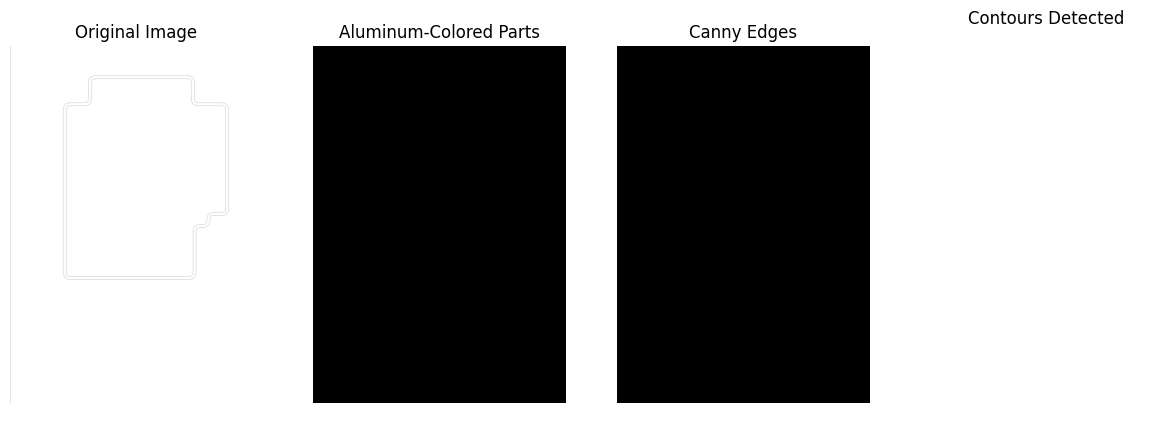

In [136]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_aluminum_parts(image_path):
    # Read the image
    img = cv2.imread(image_path)
    wt_img = cv2.imread(r"D:\Computer Vision Project\white_image.jpg")
   
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the aluminum color in HSV
    lower_aluminum = np.array([30, 0, 140])
    upper_aluminum = np.array([179, 200, 255])
    #upper_aluminum = np.array([358, 200, 90])
    

    # Create a mask using inRange to extract aluminum-colored regions
    mask = cv2.inRange(hsv, lower_aluminum, upper_aluminum)

    # Bitwise AND to obtain the aluminum-colored parts in the original image
    aluminum_parts = cv2.bitwise_and(img, img, mask=mask)

    # Convert the aluminum-colored parts to grayscale
    gray_aluminum = cv2.cvtColor(aluminum_parts, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to the grayscale image
    blurred = cv2.GaussianBlur(gray_aluminum, (5, 5), 0)

    # Use Canny edge detection
    edges = cv2.Canny(blurred, 30, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours on the original image
    img_with_contours = img.copy()
    cv2.drawContours(wt_img, contours, -1, (0, 255, 0), 2)

    # Display the original image, aluminum-colored parts, edges, and contours
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(aluminum_parts, cv2.COLOR_BGR2RGB))
    plt.title('Aluminum-Colored Parts')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(wt_img, cv2.COLOR_BGR2RGB))
    plt.title('Contours Detected')
    plt.axis('off')

    plt.show()

# Set the path to your image
image_path = 'D:\Computer Vision Project\output_image.jpg'

# Call the function to detect aluminum-colored parts and display the images
detect_aluminum_parts(image_path)


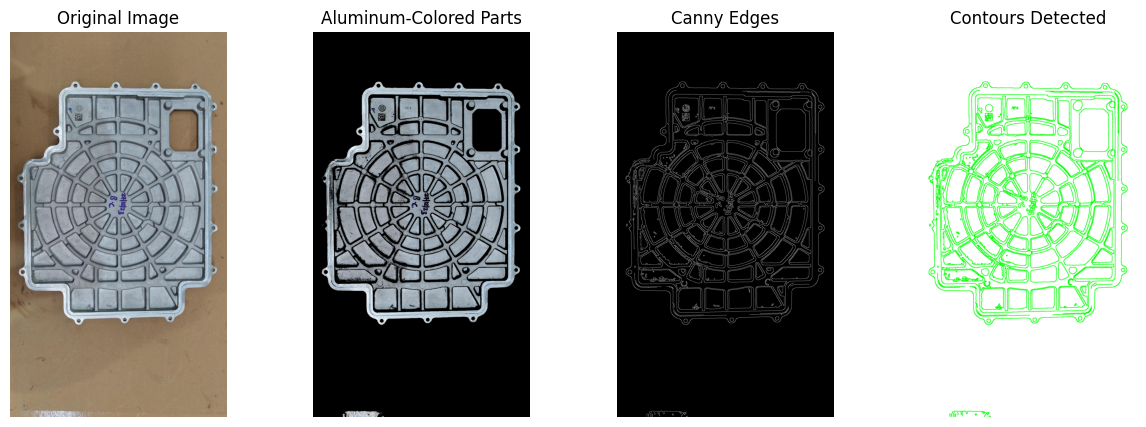

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_aluminum_parts(image_path):
    # Read the image
    img = cv2.imread(image_path)
    wt_img = cv2.imread(r"D:\Computer Vision Project\white_image.jpg")
   
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the aluminum color in HSV
    lower_aluminum = np.array([30, 0, 140])
    upper_aluminum = np.array([179, 200, 255])

    # Create a mask using inRange to extract aluminum-colored regions
    mask = cv2.inRange(hsv, lower_aluminum, upper_aluminum)

    # Bitwise AND to obtain the aluminum-colored parts in the original image
    aluminum_parts = cv2.bitwise_and(img, img, mask=mask)

    # Convert the aluminum-colored parts to grayscale
    gray_aluminum = cv2.cvtColor(aluminum_parts, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to the grayscale image with a larger kernel size
    blurred = cv2.GaussianBlur(gray_aluminum, (9, 9), 0)

    # Use Canny edge detection with adjusted parameters
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours on the original image
    img_with_contours = img.copy()
    cv2.drawContours(wt_img, contours, -1, (0, 255, 0), 2)

    # Display the original image, aluminum-colored parts, edges, and contours
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(aluminum_parts, cv2.COLOR_BGR2RGB))
    plt.title('Aluminum-Colored Parts')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(wt_img, cv2.COLOR_BGR2RGB))
    plt.title('Contours Detected')
    plt.axis('off')

    plt.show()

# Set the path to your image
image_path = r'D:\Computer Vision Project\MicrosoftTeams-image (16).png'

# Call the function to detect aluminum-colored parts and display the images
detect_aluminum_parts(image_path)


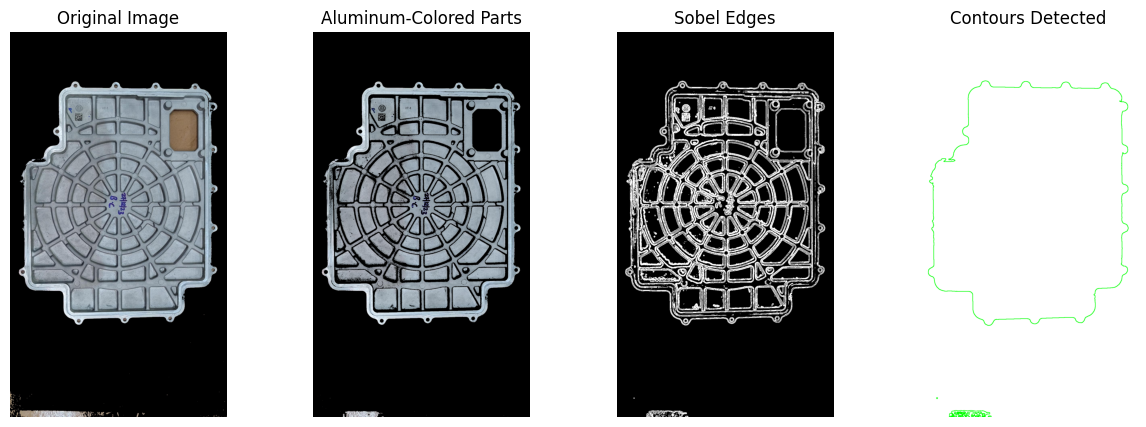

In [132]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_aluminum_parts(image_path):
    # Read the image
    img = cv2.imread(image_path)
    wt_img = cv2.imread(r"D:\Computer Vision Project\white_image.jpg")
   
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the aluminum color in HSV
    lower_aluminum = np.array([30, 0, 140])
    upper_aluminum = np.array([179, 200, 255])

    # Create a mask using inRange to extract aluminum-colored regions
    mask = cv2.inRange(hsv, lower_aluminum, upper_aluminum)

    # Bitwise AND to obtain the aluminum-colored parts in the original image
    aluminum_parts = cv2.bitwise_and(img, img, mask=mask)

    # Convert the aluminum-colored parts to grayscale
    gray_aluminum = cv2.cvtColor(aluminum_parts, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to the grayscale image with a larger kernel size
    blurred = cv2.GaussianBlur(gray_aluminum, (9, 9), 0)

    # Use Sobel edge detection
    sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

    # Combine the x and y gradients to get the magnitude
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = np.uint8(magnitude)

    # Threshold the magnitude to obtain edges
    _, edges = cv2.threshold(magnitude, 50, 255, cv2.THRESH_BINARY)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours on the original image
    img_with_contours = img.copy()
    cv2.drawContours(wt_img, contours, -1, (0, 255, 0), 2)

    # Display the original image, aluminum-colored parts, edges, and contours
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(aluminum_parts, cv2.COLOR_BGR2RGB))
    plt.title('Aluminum-Colored Parts')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(edges, cmap='gray')
    plt.title('Sobel Edges')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(wt_img, cv2.COLOR_BGR2RGB))
    plt.title('Contours Detected')
    plt.axis('off')

    plt.show()

# Set the path to your image
image_path = 'D:\Computer Vision Project\output_image.jpg'

# Call the function to detect aluminum-colored parts and display the images
detect_aluminum_parts(image_path)


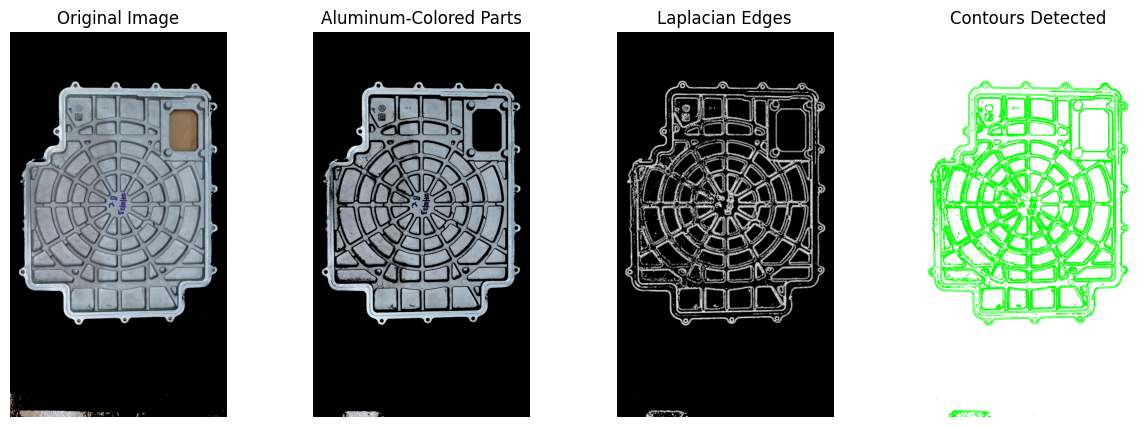

In [133]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_aluminum_parts(image_path):
    # Read the image
    img = cv2.imread(image_path)
    wt_img = cv2.imread(r"D:\Computer Vision Project\white_image.jpg")
   
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the aluminum color in HSV
    lower_aluminum = np.array([30, 0, 140])
    upper_aluminum = np.array([179, 200, 255])

    # Create a mask using inRange to extract aluminum-colored regions
    mask = cv2.inRange(hsv, lower_aluminum, upper_aluminum)

    # Bitwise AND to obtain the aluminum-colored parts in the original image
    aluminum_parts = cv2.bitwise_and(img, img, mask=mask)

    # Convert the aluminum-colored parts to grayscale
    gray_aluminum = cv2.cvtColor(aluminum_parts, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to the grayscale image with a larger kernel size
    blurred = cv2.GaussianBlur(gray_aluminum, (9, 9), 0)

    # Use Laplacian edge detection
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F, ksize=3)
    laplacian = np.uint8(np.absolute(laplacian))

    # Threshold the Laplacian to obtain edges
    _, edges = cv2.threshold(laplacian, 30, 255, cv2.THRESH_BINARY)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours on the original image
    img_with_contours = img.copy()
    cv2.drawContours(wt_img, contours, -1, (0, 255, 0), 2)

    # Display the original image, aluminum-colored parts, edges, and contours
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(aluminum_parts, cv2.COLOR_BGR2RGB))
    plt.title('Aluminum-Colored Parts')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(edges, cmap='gray')
    plt.title('Laplacian Edges')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(wt_img, cv2.COLOR_BGR2RGB))
    plt.title('Contours Detected')
    plt.axis('off')

    plt.show()

# Set the path to your image
image_path = 'D:\Computer Vision Project\output_image.jpg'

# Call the function to detect aluminum-colored parts and display the images
detect_aluminum_parts(image_path)
